<a href="https://colab.research.google.com/github/YuraLi88/hello-world-/blob/master/Phase_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
from math import pi
import matplotlib as mpl
import os
mpl.style.use('seaborn')
%config InlineBackend.figure_formats = ['svg']
PATH ='drive/My Drive/work/Phase'

In [0]:
cl = 3e10 # швидкість світла см/с
eps0= 1
eps1= 17
D = 1e-4 # 1 мкм
v0,v1 = 20e12,1.2e14 # діапазон частот

### **Вирази для амплітудних коефіцієнтів $t(\omega), r(\omega)$**
------
Розглядається нормальне падіння на плоскопаралельну прозору (діелектричну) пластинку

$$t(\omega) = e^{-i\psi}\frac{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}{2\sqrt{\varepsilon_{0}\varepsilon_{1}}\cos\varphi - i(\varepsilon_0+\varepsilon_1)\sin\varphi},$$

$$r(\omega) = \frac{i(\varepsilon_1-\varepsilon_0)\sin\varphi}{2\sqrt{\varepsilon_{0}\varepsilon_{1}}\cos\varphi - i(\varepsilon_0+\varepsilon_1)\sin\varphi},$$

де $\varphi = k_1 D,\ \psi=k_0D,\ k_j=\sqrt{\epsilon_j}\omega/c, \ j=0,1$



### Вирази фази для $t(\omega)$
---
$$Arg\, [t(\omega)\exp(i\psi)] =
 \arctan\left(\frac{\varepsilon_{0}+\varepsilon_{1}}{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}\tan{\varphi}\right)$$


Альтернативний вираз, для уникнення особливостей в точках $\varphi=\pi/2$:

$$Arg\, [t(\omega)\exp(i\psi)] = \arccos\frac{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}{\sqrt{4\varepsilon_{0}\varepsilon_{1}\cos^2\varphi+(\varepsilon_1+\varepsilon_0)\sin^2\varphi}}$$

### Вирази фази для $r(\omega)$
$$Arg\, [r(\omega)\exp(-i\pi/2)] =
 \arctan\left(\frac{\varepsilon_{0}+\varepsilon_{1}}{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}\tan{\varphi}\right)$$


Альтернативний вираз, для уникнення особливостей в точках $\varphi=\pi/2$:

$$Arg\, [r(\omega)\exp(-i\pi/2)] = \arccos\frac{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}{\sqrt{4\varepsilon_{0}\varepsilon_{1}\cos^2\varphi+(\varepsilon_1+\varepsilon_0)\sin^2\varphi}}$$

In [0]:
def phase(x):
	Z = 4*eps1*eps0+((eps1-eps0)*np.sin(x))**2
	return np.arccos(2*np.sqrt(eps0*eps1)*np.cos(x)/np.sqrt(Z))*np.sign(np.sin(x))

phase_tg = lambda x: np.arctan2(np.sin(x)*(eps1+eps0)/(2*np.sqrt(eps0*eps1)),np.cos(x))


**Всі наступні обчислення проводилися для діелектричної пластинки з наступними параметрами:**
* D=1 $\mu m$
* $\varepsilon_1$ = 17
* $\varepsilon_0$ = 1

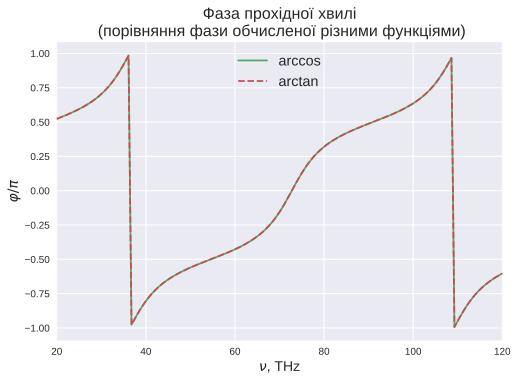

In [0]:
v = np.linspace(v0,v1,150)
fi0 = 2*pi*v*D/cl
fi1 = np.sqrt(eps1)*fi0
x=fi1 # np.linspace(0,10,150)
v_THz = v*1e-12
plt.plot(v_THz,phase(x)/pi,'C1',label='arccos')
plt.plot(v_THz,phase_tg(x)/pi,'C2--',label='arctan')
plt.xlim((v_THz[0],v_THz[-1]))
plt.title('Фаза прохідної хвилі\n (порівняння фази обчисленої різними функціями)',fontdict={'fontsize':16})
plt.xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
plt.ylabel(r'$\varphi/\pi$',fontdict={'fontsize':14})
legend = plt.legend(loc='upper center',fontsize='x-large')

plt.show()


In [0]:
os.listdir(PATH)

['RPlate1mkm.dat',
 'TPlate1mkm.dat',
 't_ReImPlate1mkm.dat_ph.dat',
 'r_ReImPlate1mkm.dat_ph.dat',
 'r_ReImPlate1mkm.dat_sew_ph.dat',
 't_ReImPlate1mkm.dat_sew_ph.dat',
 'Reps17Neq1f04a1Sig3_5E16d60Ds100nm.dat']

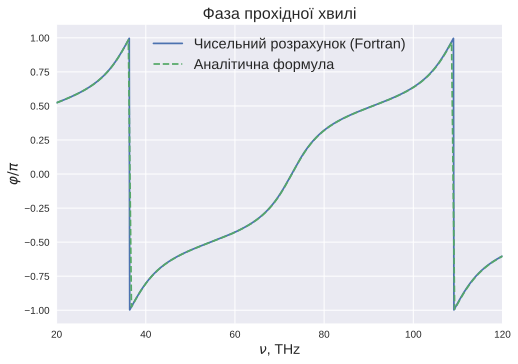

In [0]:
v,ph = np.genfromtxt(PATH+'/t_ReImPlate1mkm.dat_ph.dat').T
plt.plot(v,ph,label='Чисельний розрахунок (Fortran)')
plt.plot(v_THz,(phase(x))/pi,'--', label='Аналітична формула')
plt.xlim((v_THz[0],v_THz[-1]))
plt.title('Фаза прохідної хвилі',fontdict={'fontsize':16})
plt.xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
plt.ylabel(r'$\varphi/\pi$',fontdict={'fontsize':14})
legend = plt.legend(loc='upper center',fontsize='x-large')

plt.show()

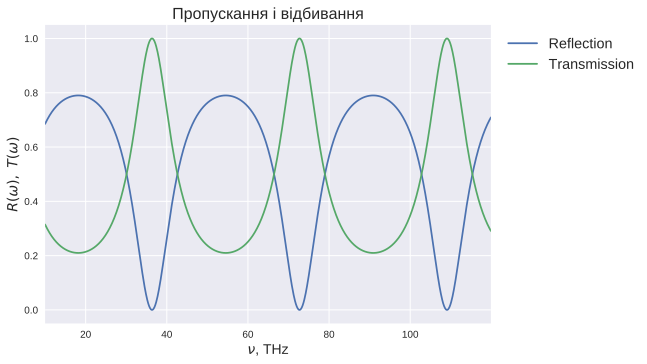

In [0]:
#@title
v,R = np.genfromtxt(PATH+'/RPlate1mkm.dat').T
v,T = np.genfromtxt(PATH+'/TPlate1mkm.dat').T
plt.plot(v,R,label='Reflection')
plt.plot(v,T,label='Transmission')
plt.xlim((v[0],v[-1]))
plt.title('Пропускання і відбивання',fontdict={'fontsize':16})
plt.xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
plt.ylabel(r'$R(\omega),\ T(\omega)$',fontdict={'fontsize':14})
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',fontsize='x-large')
frame = legend.get_frame()
frame.set_color('lightgray')
plt.show()

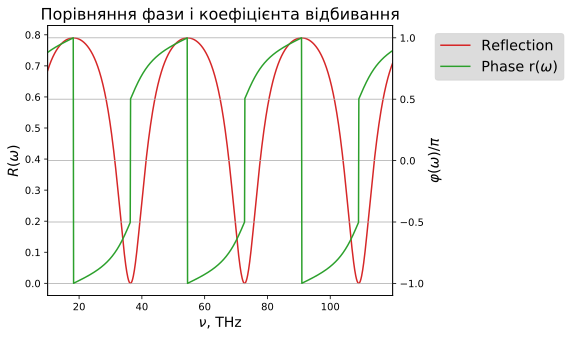

In [0]:
#@title Побудова графіка для коефцієнта відбивання і його фази
v,R = np.genfromtxt(PATH+'/RPlate1mkm.dat').T
v,ph = np.genfromtxt(PATH+'/r_ReImPlate1mkm.dat_ph.dat').T
plt.style.use( 'default')
fig, ax1 = plt.subplots()
ax1.plot(v,R,'C3',label='Reflection')
ax1.set_xlim((v[0],v[-1]))
ax1.set_xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
ax1.set_ylabel(r'$R(\omega)$',fontdict={'fontsize':14})

ax2 = ax1.twinx() 
ax2.plot(v,ph, 'C2',label=r'Phase r($\omega$)')
ax2.set_yticks([-1,-0.5,0,0.5,1])
ax2.grid(b=True, axis='y')

plt.title('Порівняння фази і коефіцієнта відбивання',fontdict={'fontsize':16})

ax2.set_ylabel(r'$\varphi(\omega)/\pi$',fontdict={'fontsize':14})
legend = fig.legend(bbox_to_anchor=(0.93, 0.9), loc='upper left',fontsize='x-large',frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('lightgray')
plt.tight_layout()
plt.show()

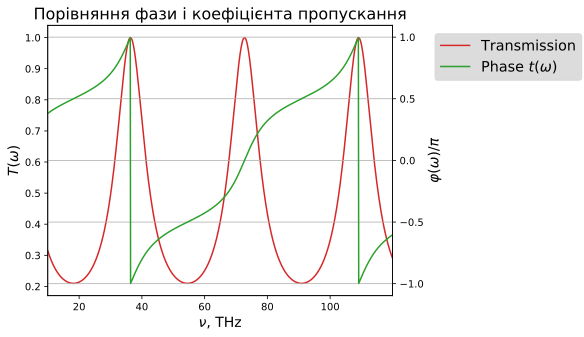

In [0]:
#@title Побудова графіка для коефцієнта пропускання і фази
v,T = np.genfromtxt(PATH+'/TPlate1mkm.dat').T
v,ph = np.genfromtxt(PATH+'/t_ReImPlate1mkm.dat_ph.dat').T
plt.style.use('default')
fig, ax1 = plt.subplots()
ax1.plot(v,T,'C3',label='Transmission')
ax1.set_xlim((v[0],v[-1]))
ax1.set_xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
ax1.set_ylabel(r'$T(\omega)$',fontdict={'fontsize':14})

ax2 = ax1.twinx() 
ax2.plot(v,ph, 'C2',label=r'Phase $t(\omega)$')
ax2.set_yticks([-1,-0.5,0,0.5,1])
ax2.grid(b=True, axis='y')
plt.title('Порівняння фази і коефіцієнта пропускання',fontdict={'fontsize':16})

ax2.set_ylabel(r'$\varphi(\omega)/\pi$',fontdict={'fontsize':14})
legend = fig.legend(bbox_to_anchor=(0.93, 0.9), loc='upper left',fontsize='x-large',frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('lightgray')
plt.tight_layout()
plt.show()

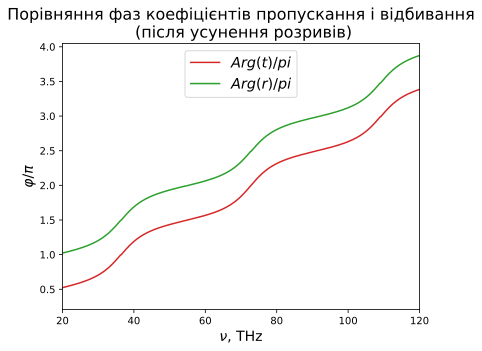

In [0]:
#@title Код для побудови графіків
v,ph_t = np.genfromtxt(PATH+'/t_ReImPlate1mkm.dat_sew_ph.dat').T
v,ph_r = np.genfromtxt(PATH+'/r_ReImPlate1mkm.dat_sew_ph.dat').T
plt.plot(v,ph_t,'C3',label=r'$Arg(t)/pi$')
plt.plot(v,ph_r,'C2',label=r'$Arg(r)/pi$')
plt.xlim((v_THz[0],v_THz[-1]))
plt.title('Порівняння фаз коефіцієнтів пропускання і відбивання\n (після усунення розривів)',fontdict={'fontsize':16})
plt.xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
plt.ylabel(r'$\varphi/\pi$',fontdict={'fontsize':14})
legend = plt.legend(loc='upper center',fontsize='x-large')
plt.show()

###Вирази для похідної фази
Starting with

$$Arg\, [r(\omega)\exp(-i\pi/2)] =
 \arctan\left(\frac{\varepsilon_{0}+\varepsilon_{1}}{2\sqrt{\varepsilon_{0}\varepsilon_{1}}}\tan{\varphi}\right)$$

$$\frac{d}{d\varphi}Arg(r(\varphi))= \frac{d}{d\varphi}
\arctan(\alpha \tan(\varphi))$$
where $\alpha=(\varepsilon_1+\varepsilon_0)/2\sqrt{\varepsilon_1\varepsilon_0}$

$$\frac{d}{d\varphi}Arg(r(\varphi))= \frac{\alpha}{\cos^2\varphi+
\alpha^2 sin^2\varphi}  = \frac{\alpha}{1+
(\alpha^2-1) sin^2\varphi} $$

After substitution expression for parameter $a$, we get

$$\frac{d}{d\varphi}Arg(r(\varphi))= \frac{(\varepsilon_0+\varepsilon_1)^2}{2\sqrt{\varepsilon_0\varepsilon_1}(\varepsilon_0+\varepsilon_1)-(\varepsilon_0-\varepsilon_1)^2\cos^2\varphi} $$


In [0]:
 alpha = (eps0+eps1)/(2*np.sqrt(eps0*eps1))
 def deriv_phase(phi):
     return alpha/(1+(alpha**2-1)*np.sin(phi)**2)


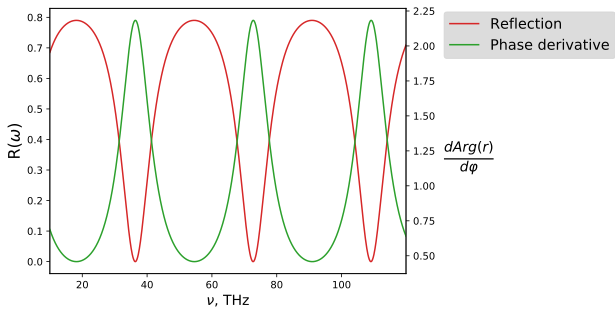

In [0]:
plt.style.use('default')
v_THz,R = np.genfromtxt(PATH+'/RPlate1mkm.dat').T
v = v_THz*1e12
fi0 = 2*pi*v*D/cl
fi1 = np.sqrt(eps1)*fi0

fig,ax0 = plt.subplots()

ax0.set_xlim((v_THz[0],v_THz[-1]))
ax0.plot(v_THz,R,'C3', label='Reflection')
ax0.set_xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
ax0.set_ylabel(r'R($\omega$)',fontdict={'fontsize':16})
ax1 = ax0.twinx()
ax1.plot(v_THz,deriv_phase(fi1),'C2',label='Phase derivative')
ax1.set_ylabel(r'$\frac{d Arg(r)}{d\varphi}$',fontsize=20,rotation=0, labelpad=35)
legend = fig.legend(bbox_to_anchor=(0.95, 0.9), loc='upper left',fontsize='x-large',frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('lightgray')
plt.show()

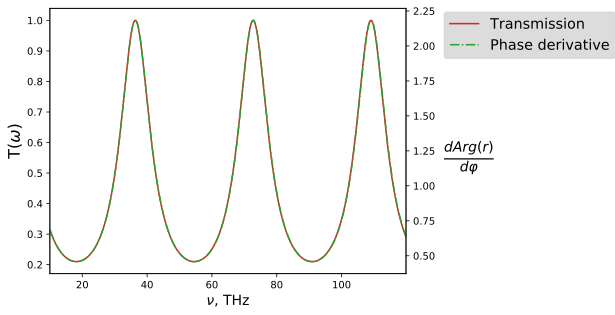

In [0]:
plt.style.use('default')
v_THz,T = np.genfromtxt(PATH+'/TPlate1mkm.dat').T
v = v_THz*1e12
fi0 = 2*pi*v*D/cl
fi1 = np.sqrt(eps1)*fi0

fig,ax0 = plt.subplots()

ax0.set_xlim((v_THz[0],v_THz[-1]))
ax0.plot(v_THz,T,'C3', label='Transmission')
ax0.set_xlabel(r'$\nu$, THz',fontdict={'fontsize':14})
ax0.set_ylabel(r'T($\omega$)',fontdict={'fontsize':16})
ax1 = ax0.twinx()
ax1.plot(v_THz,deriv_phase(fi1),'C2-.',label='Phase derivative')
ax1.set_ylabel(r'$\frac{d Arg(r)}{d\varphi}$',fontsize=20,rotation=0, labelpad=35)
legend = fig.legend(bbox_to_anchor=(0.95, 0.9), loc='upper left',fontsize='x-large',frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('lightgray')
plt.show()

Simple dampened oscillator

$$Arg\, x(\omega) = arccos\frac{\omega^2-\omega_0^2}{\sqrt{(\omega^2-\omega_0^2)^2+4\gamma^2\omega^2}}$$


In [0]:
class oscillator():
    def __init__(self,nu0,gamma):
        self.w0 = 2*pi*nu0
        self.g = gamma

    def phase_spectra(self,v0,v1, N=500):
        v =np.linspace(v0,v1,N)
        w = 2*pi*v
        W = w**2-self.w0**2
        Z =np.sqrt(W**2 + (2*self.g*w)**2)
        return v*1e-12, np.arccos(W/Z)/pi #*np.sign(W)


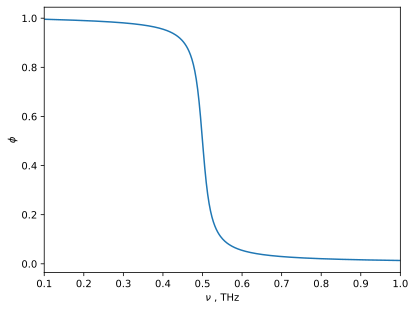

In [0]:
simple_osc = oscillator(0.5e12, 1e11)
spectra = simple_osc.phase_spectra(1e11,1e12)
plt.plot(*spectra)
plt.xlim((spectra[0][0],spectra[0][-1]))
plt.xlabel(r'$\nu$ , THz')
plt.ylabel(r'$\phi$')
plt.show()

Амплітудний коефіцієнт відбивання металевої гратки
$$r(\omega) = \frac{i\omega\Gamma}{\omega^2-\omega_0^2+i\omega(\gamma+\Gamma)}$$
$$t(\omega) = r(\omega)+1$$
$$\arg\, r(\omega) = \arctan\frac{\omega^2-\omega^2_0}{\omega(\gamma+\Gamma)}$$

$$\arg\, r(\omega) = \arccos\frac{\omega^2-\omega^2_0}{\sqrt{(\omega^2-\omega^2_0)^2+\omega^2(\gamma+\Gamma)^2}}$$


In [0]:
class Grating(object):
    """docstring for Grating"""
    def __init__(self, nu0=1e12, Gamma=1e11, gamma=2e11, tau=None):
        self.w0 = 2*pi*nu0
        self.Gamma = Gamma if tau is None else 1./tau
        self.gamma = gamma
        self.range = None

    # def set_range(v_start,v_stop,N):
    #   v = np.linspace(v_start,v_stop,N)
    #   w = 2*pi*v
    #   self.range = w

    def r_w(self,v):
        w = 2*pi*v
        r = 1j*w*self.Gamma/(w**2-self.w0**2-1j*w*(self.gamma+self.Gamma))
        return r
        

    def r_spectra(self,v_start,v_stop,N=500):
        v = np.linspace(v_start,v_stop,N)
        w = 2*pi*v
        self.range = w
        r = 1j*w*self.Gamma/(w**2-self.w0**2+1j*w*(self.gamma+self.Gamma))
        return v,r
    
    def R_spectra(self,v_start,v_stop,N=500):
        v,r = self.r_spectra(v_start,v_stop,N)
        R = np.abs(r)**2
        return v*1e-12,R

    def phase_spectra(self,v_start,v_stop,N=300):
        v = np.linspace(v_start,v_stop,N)
        w = 2*pi*v
        self.range = w
        W = w**2-self.w0**2
        fi =np.arccos(W/np.sqrt(W**2+(w*(self.gamma+self.Gamma))**2))
        return v,fi/pi
    

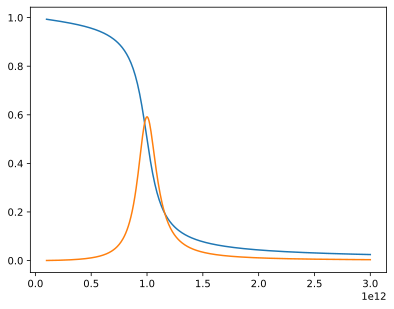

In [0]:
grat = Grating(1e12,1e12,3e11)

phase = grat.phase_spectra(1e11,3e12)
v,refl = grat.r_spectra(1e11,3e12)
R = np.abs(refl)**2
plt.plot(*phase)
plt.plot(v,R)
plt.show()

In [0]:
class plate(object):
	"""initialize dielectric plate instance eps0 -- dielectric permittivity of enviroment
	eps1 -- dielectric permittivity of plate
	D -- thikness in mkm"""
	def __init__(self, eps0=1, eps1=3, Dmkm=10):
		cl = 3e10
		Dcm = Dmkm*1e-4
		self.eps0 = eps0
		self.eps1 = eps1
		self.k = 2*pi*np.sqrt(eps1)*Dcm/cl
		print(self.k)

	def r_w(self,v):
		fi = self.k*v
		Z = 2*np.sqrt(self.eps1*self.eps0)*np.cos(fi)-1j*(self.eps1+self.eps0)*np.sin(fi)
		return 1j*(self.eps1-self.eps0)*np.sin(fi)/Z

	def R_spectra(self,v_start,v_stop,N=500,units='THz'):
		v = np.linspace(v_start,v_stop,N)
		R = np.abs(self.r_w(v))**2
		if units=='THz':
			v=v*1e-12
		return v, R

8.377580409572783e-15


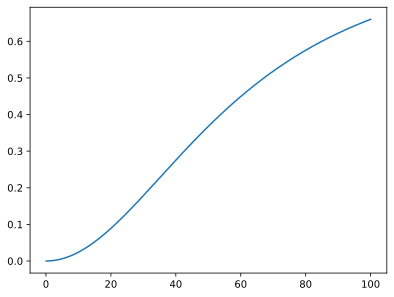

In [0]:
plate10mkm = plate(eps1=16, Dmkm=0.1)
plate_spectra = plate10mkm.R_spectra(1e11,100e12,500)
plt.plot(*plate_spectra)
plt.show()

In [0]:
class structure(object):
    """Create Structure instance, which consist with
    dielectric plate and grating.
    
    Input: plate object, grating object. 
    All argumens are optional, default value is None"""
    def __init__(self, plate=None,grating=None):
        self.plate = plate
        self.grating = grating
    def r_w(self,v):
        r_p = self.plate.r_w(v) if self.plate is not None else 0
        r_g = self.grating.r_w(v)  if self.grating is not None else 0
        return (1+r_p)*(1-r_g)-1

    def r_spectra(self,v_start,v_stop,N=500,units='THz'):
        v = np.linspace(v_start,v_stop,N)
        r_ = self.r_w(v)
        if units=='THz':
            v=v*1e-12
        return v, r_
        
        
    def R_spectra(self,v_start,v_stop,N=500,units='THz'):
        v, r = self.r_spectra(v_start,v_stop,N=500,units='THz')
        R = np.abs(r)**2
        return v, R
    
    def phase_spectra(self,v_start,v_stop,N=500,units='THz'):
        v, r = self.r_spectra(v_start,v_stop,N=500,units='THz')
        fi = np.arccos(np.real(r)/np.abs(r))*np.sign(np.imag(r))/pi
        return v, fi

In [0]:
fill = 0.4
sig = 3.5e16
d= 6e-6 # 40 nm
eps = (1+16)/2
tau = 1e-13
sig2D = sig*d
Gamma = 2*pi*fill*sig2D/(cl*np.sqrt(eps)*tau)
print(f'{Gamma:5.3e}')

6.034e+13


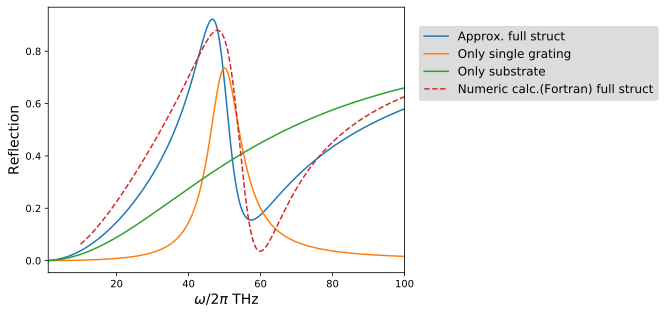

In [0]:
grat = Grating(nu0=50e12,Gamma=Gamma,gamma=1e13)
v0,R0= np.genfromtxt(PATH+'/Reps17Neq1f04a1Sig3_5E16d60Ds100nm.dat').T
struct = structure(plate=plate10mkm,grating=grat)
v,R=struct.R_spectra(1e12,100e12,N=500)
v1,R1 = grat.R_spectra(1e12,100e12,N=500)
v2,R2 = plate10mkm.R_spectra(1e12,100e12,N=500)
# print(R1.shape)
plt.plot(v,R, label='Approx. full struct')
plt.plot(v1,R1, label= 'Only single grating')
plt.plot(v2,R2, label = 'Only substrate')
plt.plot(v0,R0,'--',label='Numeric calc.(Fortran) full struct')
plt.xlim((v1[0],v1[-1]))
plt.ylabel('Reflection',fontdict={'fontsize':14})
plt.xlabel(r'$\omega/2\pi$ THz',fontdict={'fontsize':14})
legend = plt.legend(bbox_to_anchor=(1.025, 0.95), loc='upper left',fontsize='large',frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('lightgray')
plt.show()

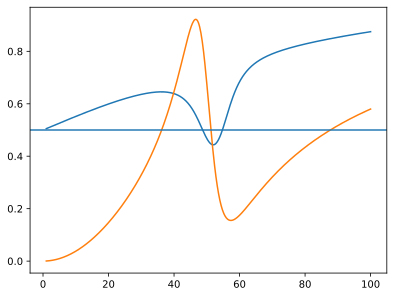

In [0]:
phase = struct.phase_spectra(1e12,100e12,N=500)
plt.plot(*phase)
plt.plot(*struct.R_spectra(1e12,100e12,N=500))
plt.axhline(y=0.5)
plt.show()

In [0]:
from math import pi, sqrt
el = 4.8e-10
m = 9.11e-28
cl = 3e10

class el_2Dgas():
    """An electron 2D gas instance
    
    input:
        n2D -- electron concentration cm^(-2)
        tau -- momentum relaxation time, c
        eps = 1 -- dielectric constant of adjacent enviroment (optional)

    return: 
       el_2Dgas instance
    """
    
    def __init__(self, n2D, tau, eps=1, name = '2D gas'):
        
        self.n2D = n2D
        self.tau = tau 
        self.gamma = 1./tau
        self.Gamma = 2*pi*el**2*n2d/(m*sqrt(eps)*cl)
        self.name = name
        

    def r_w(self,v):
        w = 2*pi*v
        return -1j*self.Gamma/(w+1j*(self.gamma+self.Gamma))
    
    def t_w(self,v):
        return 1+self.r(v)
    


In [0]:
def plot_spectra(obj, range, N = 300):
    """ Plot reflection module and phase for object in defined range

    Input arguments:
        obj: object with implemented r_w method, which return amplitude reflection coeffitient
        range: tuple (start_frecuency, stop_frequency), THz
        N=300: count of points (optional)
    """
    from math import pi
    v = np.linspace(*range, N)
    r = obj.r_w(v)
    phase_r = np.angle(r)/pi
    R = np.abs(r)**2
    vHz = v*1e12 
    plt.plot(v,R, label='')
    plt.plot(v,phase_r)
    plt.show()